# Comparison of computation  time of Methods

In which we define two methods, use cell magick to compare how long they take to run and then plot thier cost as a function of the size of the input variable.

In [1]:
from random import randint
import pandas as pd
from matplotlib import pyplot

## Define functions to be tested

> **Note** Functions should have a descriptive first line of the docstring
> since this will be used to label the data.


In [10]:
def uniq1(iterable):
    """list method
    
    Check whether item is in a list and add it if not.
    """
    ret = []
    for item in iterable:
        if item not in ret:
            ret.append(item)
    return ret


def uniq2(iterable):
    """dict method
    
    Check whether item is in a list and add it if not.
    """
    ret = {}
    for item in iterable:
        ret[item] = None
    return list(ret)

## Use timeit to measure each functions execution time.

In [21]:
results = {}
for func in [uniq1, uniq2]:
    func_name = func.__doc__.split('\n')[0]
    results[func_name] = {}
    for i in range(0, 1000000, 100000)[1:]:
        test_list = [randint(1, 10) for i in range(i)]
        result = %timeit -o func(test_list)
        results[func_name][i] = result.average

6.01 ms ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12 ms ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.2 ms ± 388 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
24.2 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.7 ms ± 557 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.3 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.3 ms ± 82.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.5 ms ± 613 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.5 ms ± 340 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.11 ms ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.34 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.45 ms ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.5 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.9 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
19 ms 

## Convert to Dataframe and Plot

In [22]:
df = pd.DataFrame(results)

<AxesSubplot: title={'center': 'Comparison of Checking lists for \nunique items vs using dictionary keys'}, xlabel='list length', ylabel='Time (s)'>

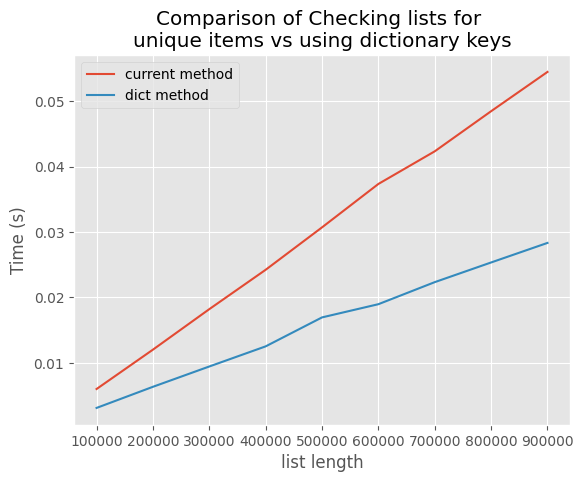

In [28]:
pyplot.style.use('ggplot')   # I just like R style plots, OK?

df.plot(
    xlabel="list length",
    ylabel="Time (s)",
    title="Comparison of Checking lists for \nunique items vs using dictionary keys"
)